# Reddit Sentiment Analysis Project (Practice)

Modified sour
ce code by Patrick Loeber.

source code: https://www.youtube.com/watch?v=8VZhog5C3bU

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import praw

user_agent = "PracticeScraper 1.0 by /u/lmluk"
reddit = praw.Reddit(
    client_id="I7UtuKPLzIkEATK-e42-cg",
    client_secret="9K6fKvSbvO6o3fW0rNzxGpnHFnTeWw",
    user_agent=user_agent
)

## Scraping Subreddit
Using PRAW to scrape data from subreddits.
Export to csv file.

reference: https://praw.readthedocs.io/en/latest/code_overview/models/submission.html

In [3]:
#hot new rising top

headlines = set()
for submission in reddit.subreddit('Genshin_Impact').hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

629


In [41]:
#pay to win, top

p2w_headlines = set()
for submission in reddit.subreddit('Genshin_Impact').search('pay to win'):
    p2w_headlines.add(submission.title)

In [42]:
df2 = pd.DataFrame(p2w_headlines)
df2.head(10)

,0
0,If all of the members of a single element team...
1,Do you think Genshin has been underappreciated...
2,Lumine's life as the Traveler is not easy for ...
3,Spin to Win (can someone with decent builds pl...
4,This game will suffer with the inevitable rise...
5,Genshin monetization system and how to enjoy t...
6,Are we sleeping on the Blackcliff set?
7,HoYoverse statement regarding the missing VA p...
8,"Not meta card but it was fun Noelle, Xinqui/Ni..."
9,In case you didnt know you should lock the dar...


In [43]:
#dump to CSV file

df2.to_csv(r'/Users/kirbypark/Desktop/JupyterNotebook/p2w_headlines.csv', index=False, header=True)

## Sentiment Analysis
Using nltk to tell whether a post has been received positively, negatively, or neutrally by the community.

In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kirbypark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in p2w_headlines:
    pol_score = sia.polarity_scores(line) #auto sentiment classification that returns dict
    pol_score['headline'] = line #store current line as a headline key in dict
    results.append(pol_score) #append to results
    
pprint(results[:3], width=100) #append first 3 results to see what it looks like

[{'compound': 0.296,
  'headline': 'If all of the members of a single element teamed up and had to fight the other '
              'groups of elements, which one would win?',
  'neg': 0.095,
  'neu': 0.766,
  'pos': 0.139},
 {'compound': 0.0,
  'headline': 'Do you think Genshin has been underappreciated overtime?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.3376,
  'headline': "Lumine's life as the Traveler is not easy for her trying to reunite with her "
              'Brother, but with Paimon and her allies by her side, it helps pay the bills!',
  'neg': 0.097,
  'neu': 0.794,
  'pos': 0.109}]


In [46]:
#creating a dataframe

df2 = pd.DataFrame.from_records(results)
df2.head()

,neg,neu,pos,compound,headline
0,0.095,0.766,0.139,0.2960,If all of the members of a single element team...
1,0.000,1.000,0.000,0.0000,Do you think Genshin has been underappreciated...
2,0.097,0.794,0.109,0.3376,Lumine's life as the Traveler is not easy for ...
3,0.000,0.596,0.404,0.7269,Spin to Win (can someone with decent builds pl...
4,0.259,0.741,0.000,-0.5423,This game will suffer with the inevitable rise...


In [48]:
#new column label

df2['label'] = 0 
df2.loc[df2['compound'] > 0.2, 'label' ] = 1 #positive
df2.loc[df2['compound'] < -0.2, 'label'] = -1 #negative
df2.head()

,neg,neu,pos,compound,headline,label
0,0.095,0.766,0.139,0.2960,If all of the members of a single element team...,1
1,0.000,1.000,0.000,0.0000,Do you think Genshin has been underappreciated...,0
2,0.097,0.794,0.109,0.3376,Lumine's life as the Traveler is not easy for ...,1
3,0.000,0.596,0.404,0.7269,Spin to Win (can someone with decent builds pl...,1
4,0.259,0.741,0.000,-0.5423,This game will suffer with the inevitable rise...,-1


In [49]:
df3 = df2[['headline', 'label']]

In [51]:
df3.to_csv(r'/Users/kirbypark/Desktop/JupyterNotebook/reddit_headlines_labels.csv', index=False)

## Miscellaneous

Doing more stuff - e.g., plotting. 

In [52]:
#check number of positive, negative, neutral headlines

df2.label.value_counts()

 1    50
 0    32
-1    18
Name: label, dtype: int64

In [53]:
#percent value

df2.label.value_counts(normalize=True) * 100

 1    50.0
 0    32.0
-1    18.0
Name: label, dtype: float64

In [54]:
#print a few positive headlines
print('Positive headlines:\n')
pprint(list(df2[df2['label'] == 1].headline)[:5], width=200)

#print a few negative headlines
print('\nNegative headlines:\n')
pprint(list(df2[df2['label'] == -1].headline)[:5], width=200)

Positive headlines:

['If all of the members of a single element teamed up and had to fight the other groups of elements, which one would win?',
 "Lumine's life as the Traveler is not easy for her trying to reunite with her Brother, but with Paimon and her allies by her side, it helps pay the bills!",
 'Spin to Win (can someone with decent builds please do this)',
 'Genshin monetization system and how to enjoy the game responsably as a F2P player',
 'Not meta card but it was fun Noelle, Xinqui/Ningguang and Raiden. If you going to ask if I do win with answer yes 5 W 2 L every match mostly.']

Negative headlines:

['This game will suffer with the inevitable rise of private servers.',
 'HoYoverse statement regarding the missing VA payments',
 'In case you didnt know you should lock the dark iron sword. You will never get it again if you accidently delete it or fed it as exp to another weapon.',
 'How to NOT win 11-1 spiral abyss',
 'Genshin Impact would possibly need more craftable weapo

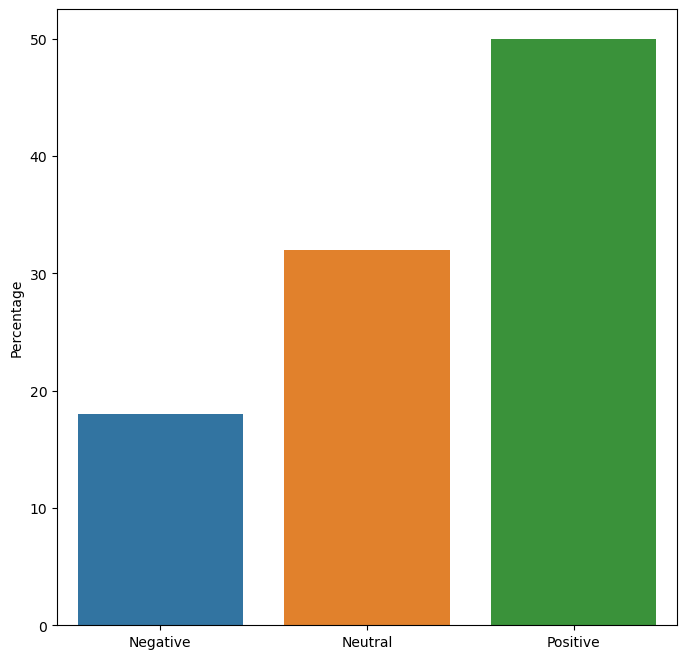

In [56]:
#plotting data
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()